In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
medi_ds = pd.read_csv("medical_cost_insurance.csv")


medi_ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
medi_ds.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
print("Rows, Columns: " + str(medi_ds.shape))

Rows, Columns: (1338, 7)


In [5]:
print(medi_ds.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [6]:
print(medi_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [7]:
medi_ds.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
print("Number of duplicates", medi_ds.duplicated().sum())

Number of duplicates 1


In [10]:
medi_ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


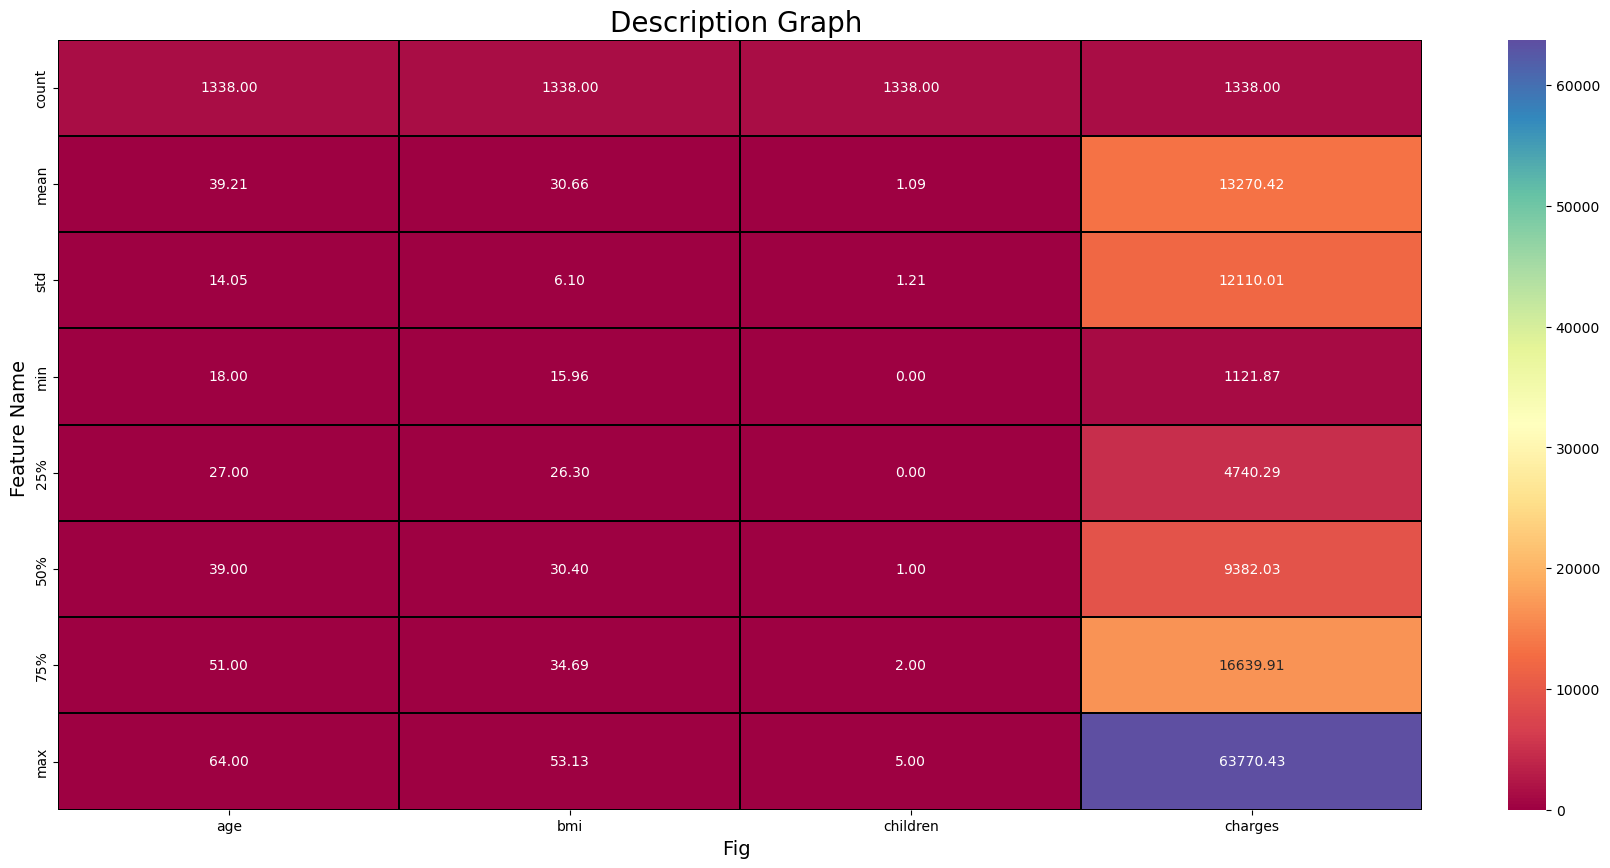

In [11]:
plt.figure(figsize=(22,10))
sns.heatmap(medi_ds.describe(), annot = True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Fig ',fontsize=14)
plt.ylabel('Feature Name ', fontsize=14)
plt.title('Description Graph ',fontsize=20)
plt.show()

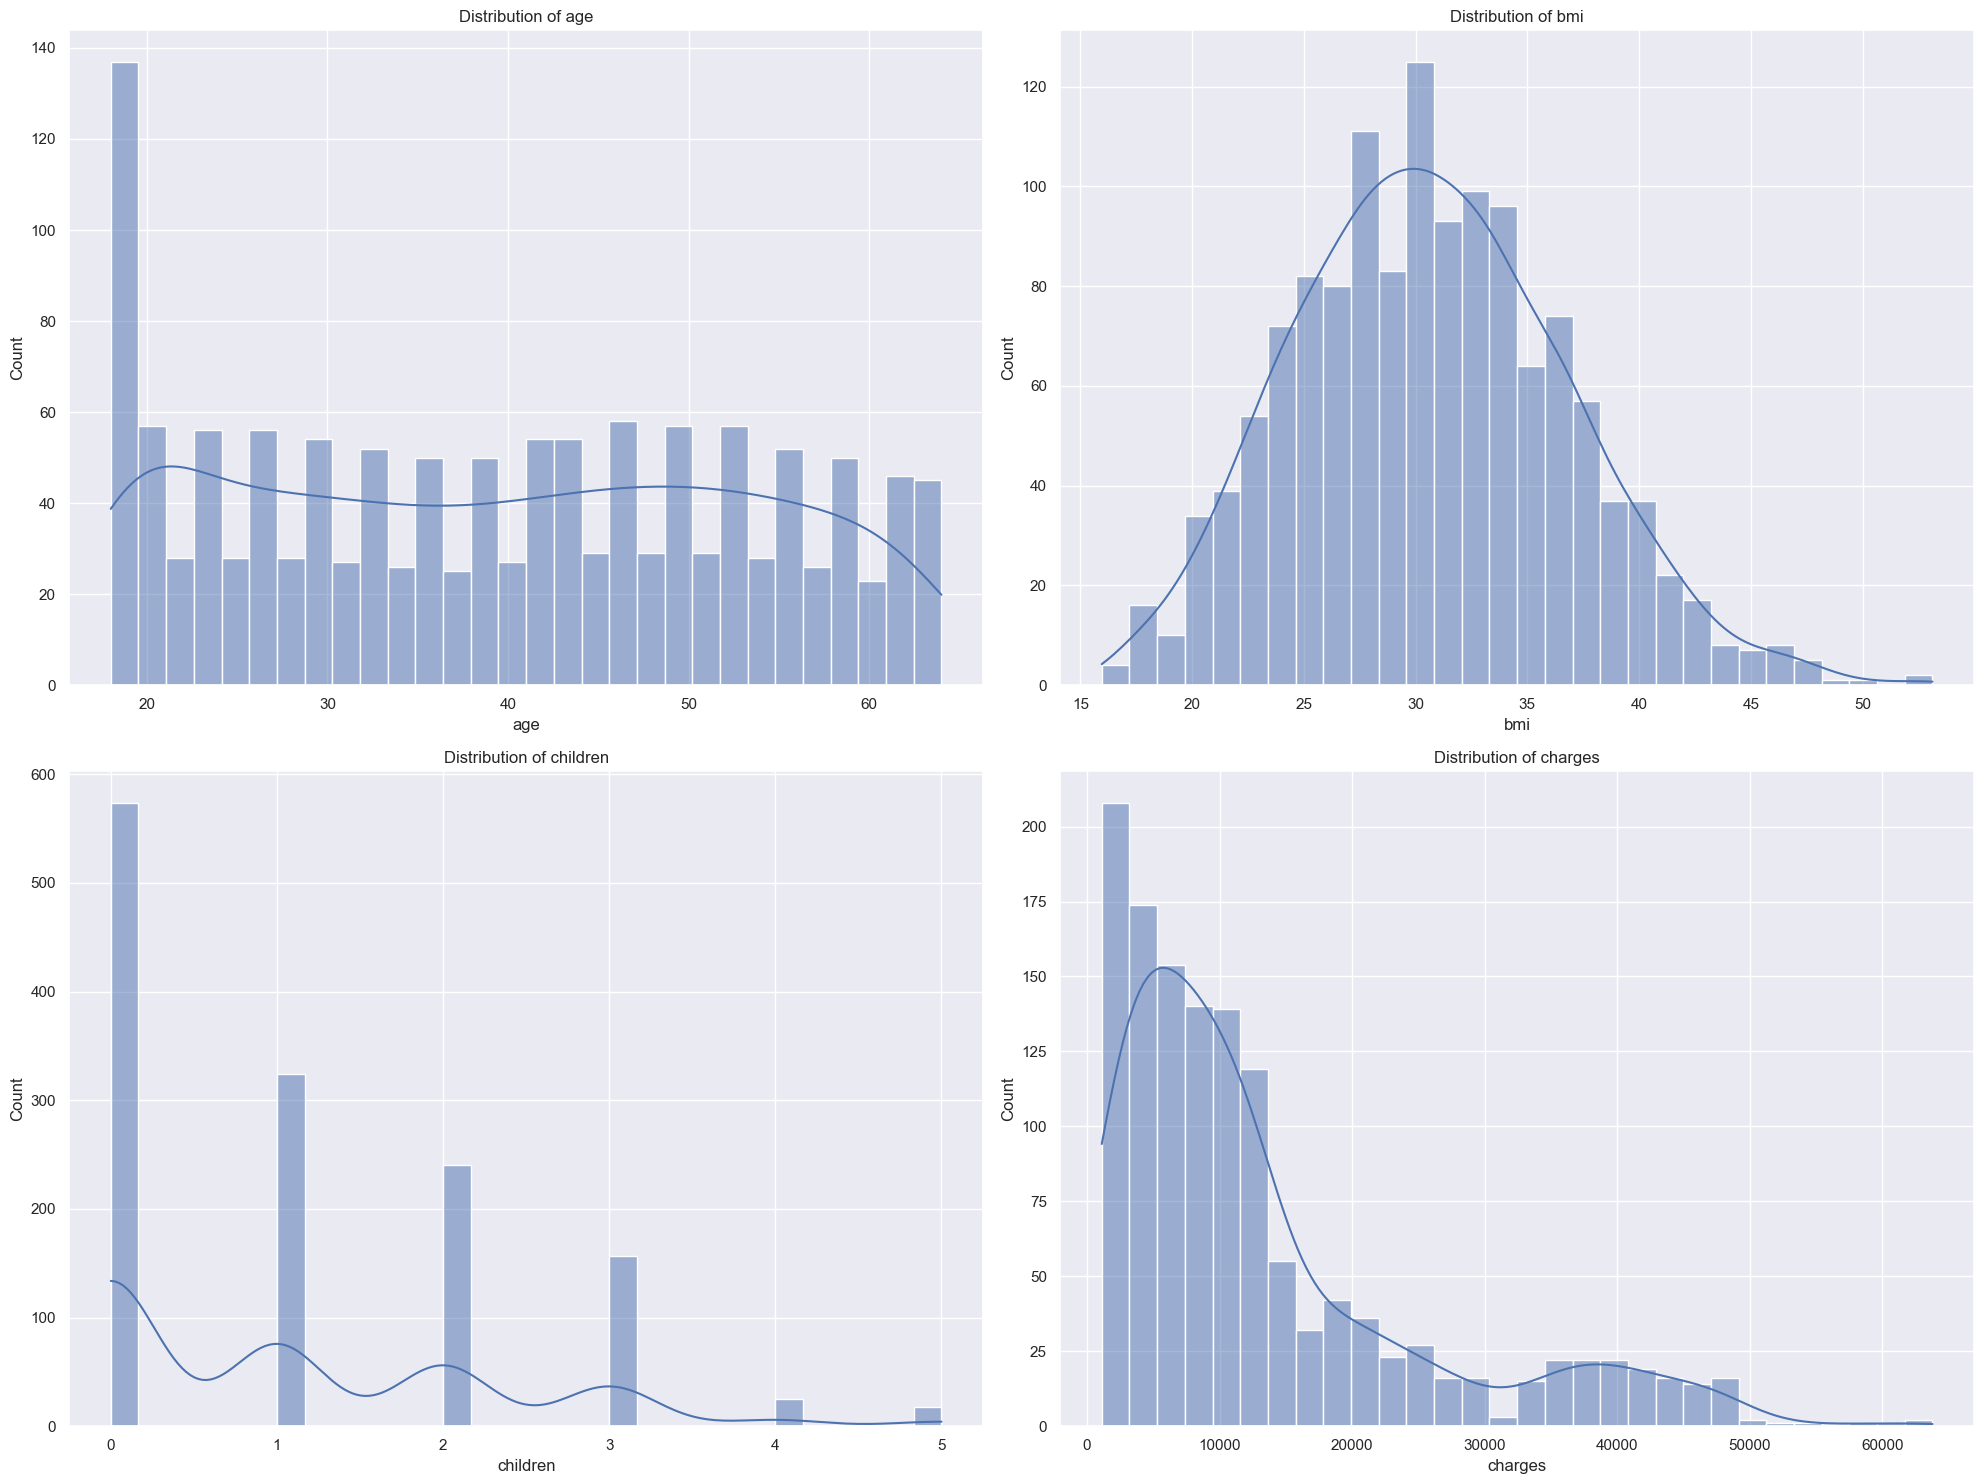

In [16]:
sns.set(style="darkgrid")

plt.figure(figsize=(20, 15))


Num_coloumns = ['age', 'bmi', 'children', 'charges']


for i, column in enumerate(Num_coloumns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(medi_ds[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

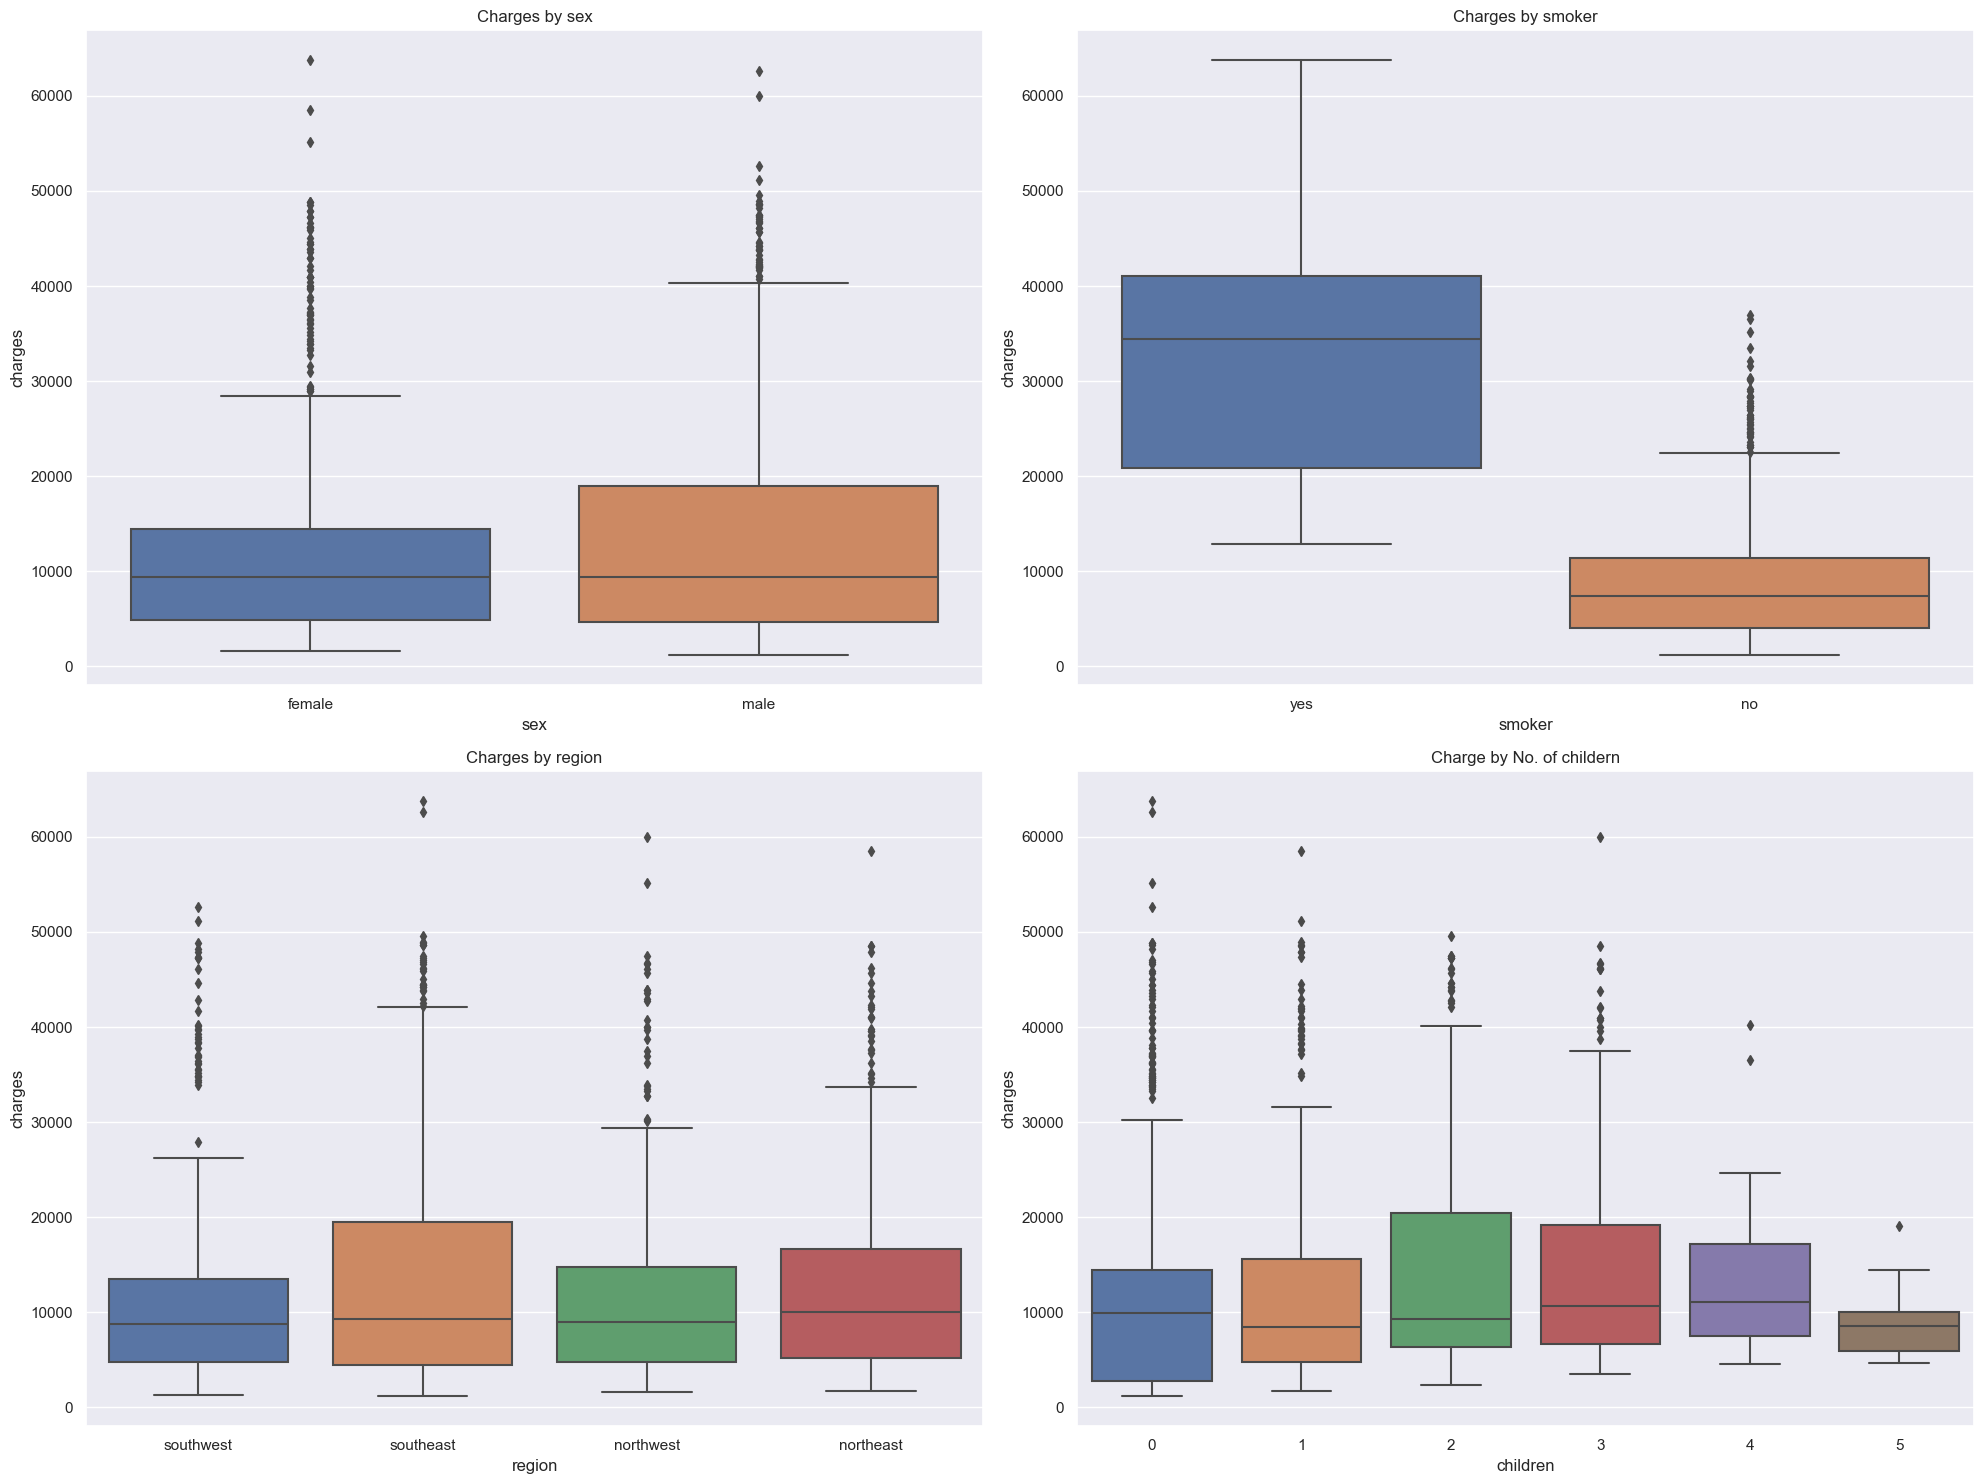

In [17]:
plt.figure(figsize=(20, 15))

category_column = ['sex', 'smoker', 'region']


for i, column in enumerate(category_column, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=column, y='charges', data=medi_ds)
    plt.title(f'Charges by {column}')


plt.subplot(2, 2, 4)
sns.boxplot(x='children', y='charges', data=medi_ds)
plt.title('Charge by No. of childern')

plt.tight_layout()
plt.show()

In [20]:
import plotly.express as px

figure = px.scatter(medi_ds, x='age', y='charges', trendline='ols')


figure.update_traces(marker=dict(color='purple'))
figure.update_layout(
    title='Age vs Medical Charges',
    xaxis_title='Age',
    yaxis_title='Medical Charges'
)

figure.show()

In [21]:
figure = px.scatter(medi_ds, x='bmi', y='charges', trendline='ols')

figure.update_traces(marker=dict(color='purple'))
figure.update_layout(
    title='BMI vs Medical Charges',
    xaxis_title='BMI',
    yaxis_title='Medical Charges'
)

figure.show()

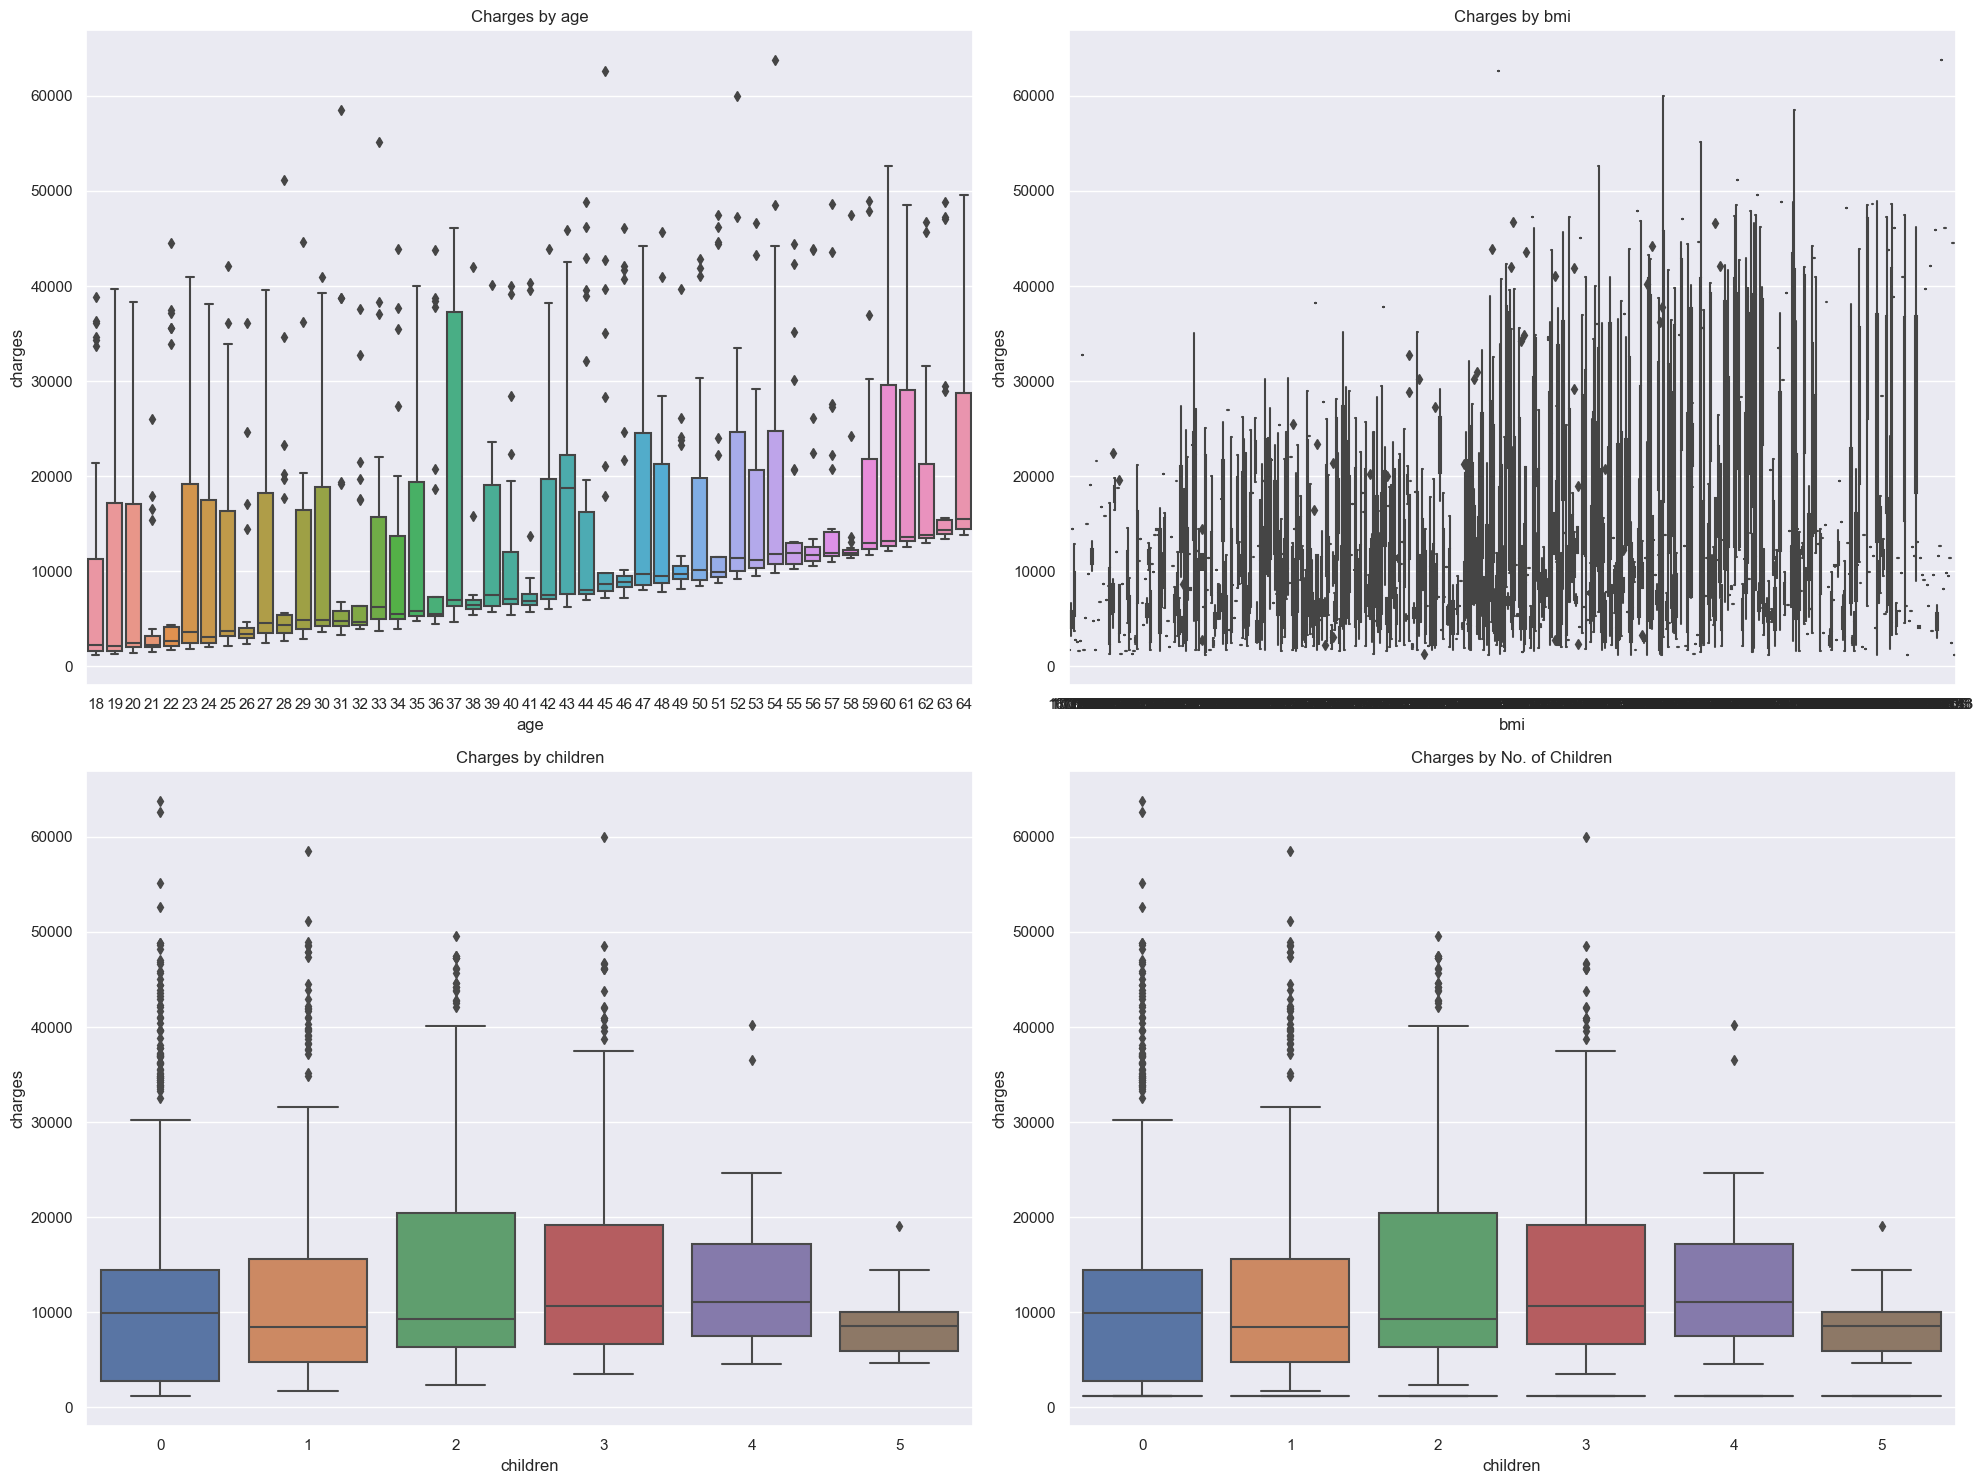

In [22]:
plt.figure(figsize=(20, 15))


num_coloumn = ['age', 'bmi', 'children', 'charges']


for i, column in enumerate(num_coloumn, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=column, y='charges', data=medi_ds)
    plt.title(f'Charges by {column}')


plt.subplot(2, 2, 4)
sns.boxplot(x='children', y='charges', data=medi_ds)
plt.title('Charges by No. of Children')

plt.tight_layout()
plt.show()

In [23]:
from scipy.stats import zscore
num_coloumn = medi_ds[['age', 'bmi', 'children']]

a=np.abs(zscore(num_coloumn ))

a

,age,bmi,children
0,1.438764,0.453320,0.908614
1,1.509965,0.509621,0.078767
2,0.797954,0.383307,1.580926
3,0.441948,1.305531,0.908614
4,0.513149,0.292556,0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,1.509965,0.206139,0.908614
1335,1.509965,1.014878,0.908614
1336,1.296362,0.797813,0.908614


In [24]:
np.where(a>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
         932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
       dtype=int64),
 array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1],
       dtype=int64))

In [25]:
a.iloc[71,2]

3.240618711442044

In [26]:
ds = medi_ds[(a<3).all(axis=1)]

ds.shape

(1316, 7)

In [28]:
print("Old df ", medi_ds.shape[0])

print("New df ", ds.shape[0])

Old df  1338
New df  1316


In [29]:
print("Data Loss %- ", ((medi_ds.shape[0]-ds.shape[0])/medi_ds.shape[0])*100)

Data Loss %-  1.6442451420029895


In [30]:
medi_ds=ds

In [31]:
medi_ds.skew()

age         0.049904
bmi         0.193564
children    0.740881
charges     1.501055
dtype: float64

In [32]:
medi_ds.corr()

,age,bmi,children,charges
age,1.000000,0.119062,0.058319,0.299554
bmi,0.119062,1.000000,0.027706,0.203195
children,0.058319,0.027706,1.000000,0.090870
charges,0.299554,0.203195,0.090870,1.000000


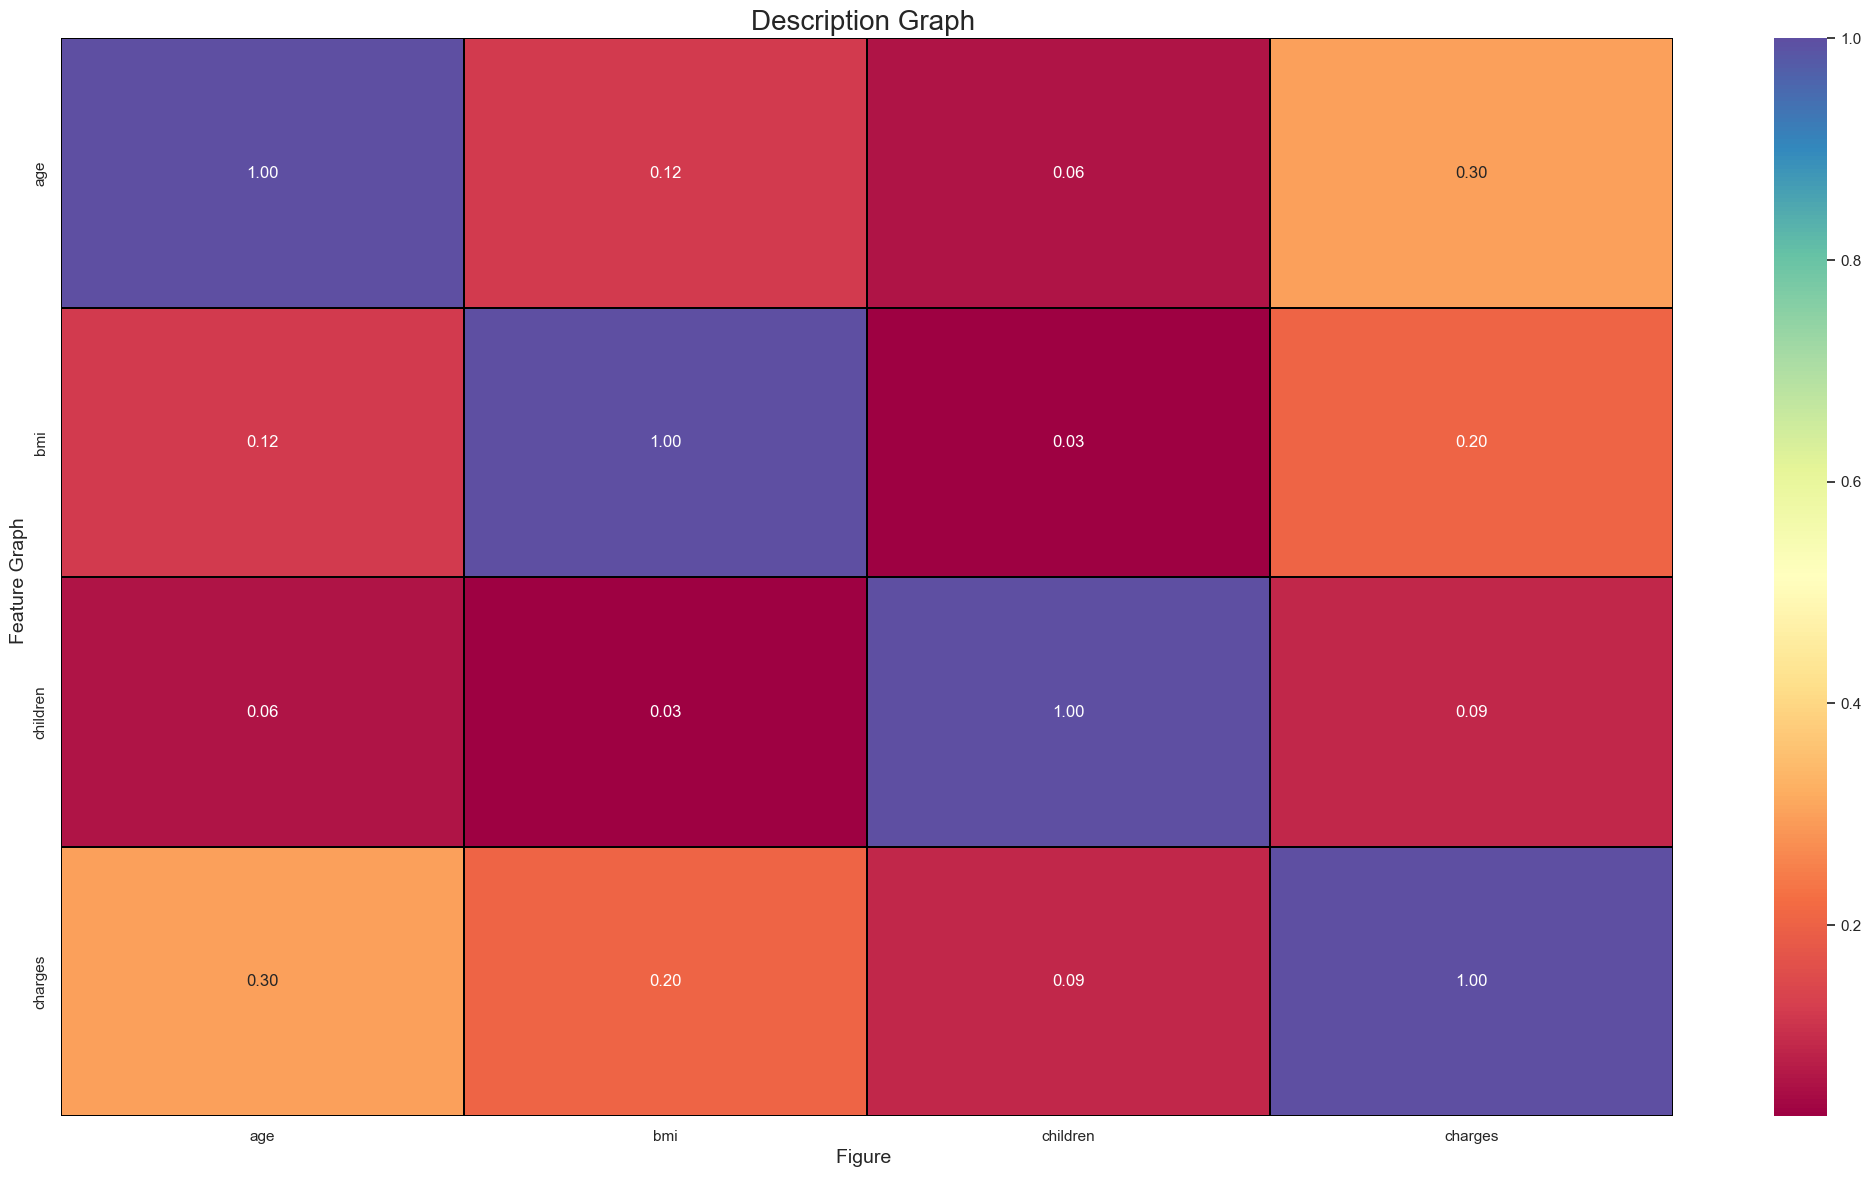

In [34]:
plt.figure(figsize = (26, 14))
sns.heatmap(medi_ds.corr(),annot = True, fmt='0.2f',linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure ', fontsize = 14)
plt.ylabel('Feature Graph ', fontsize= 14)
plt.title('Description Graph ', fontsize = 20)

plt.show()

Text(0.5, 1.0, 'Correlation n/w label and feature')

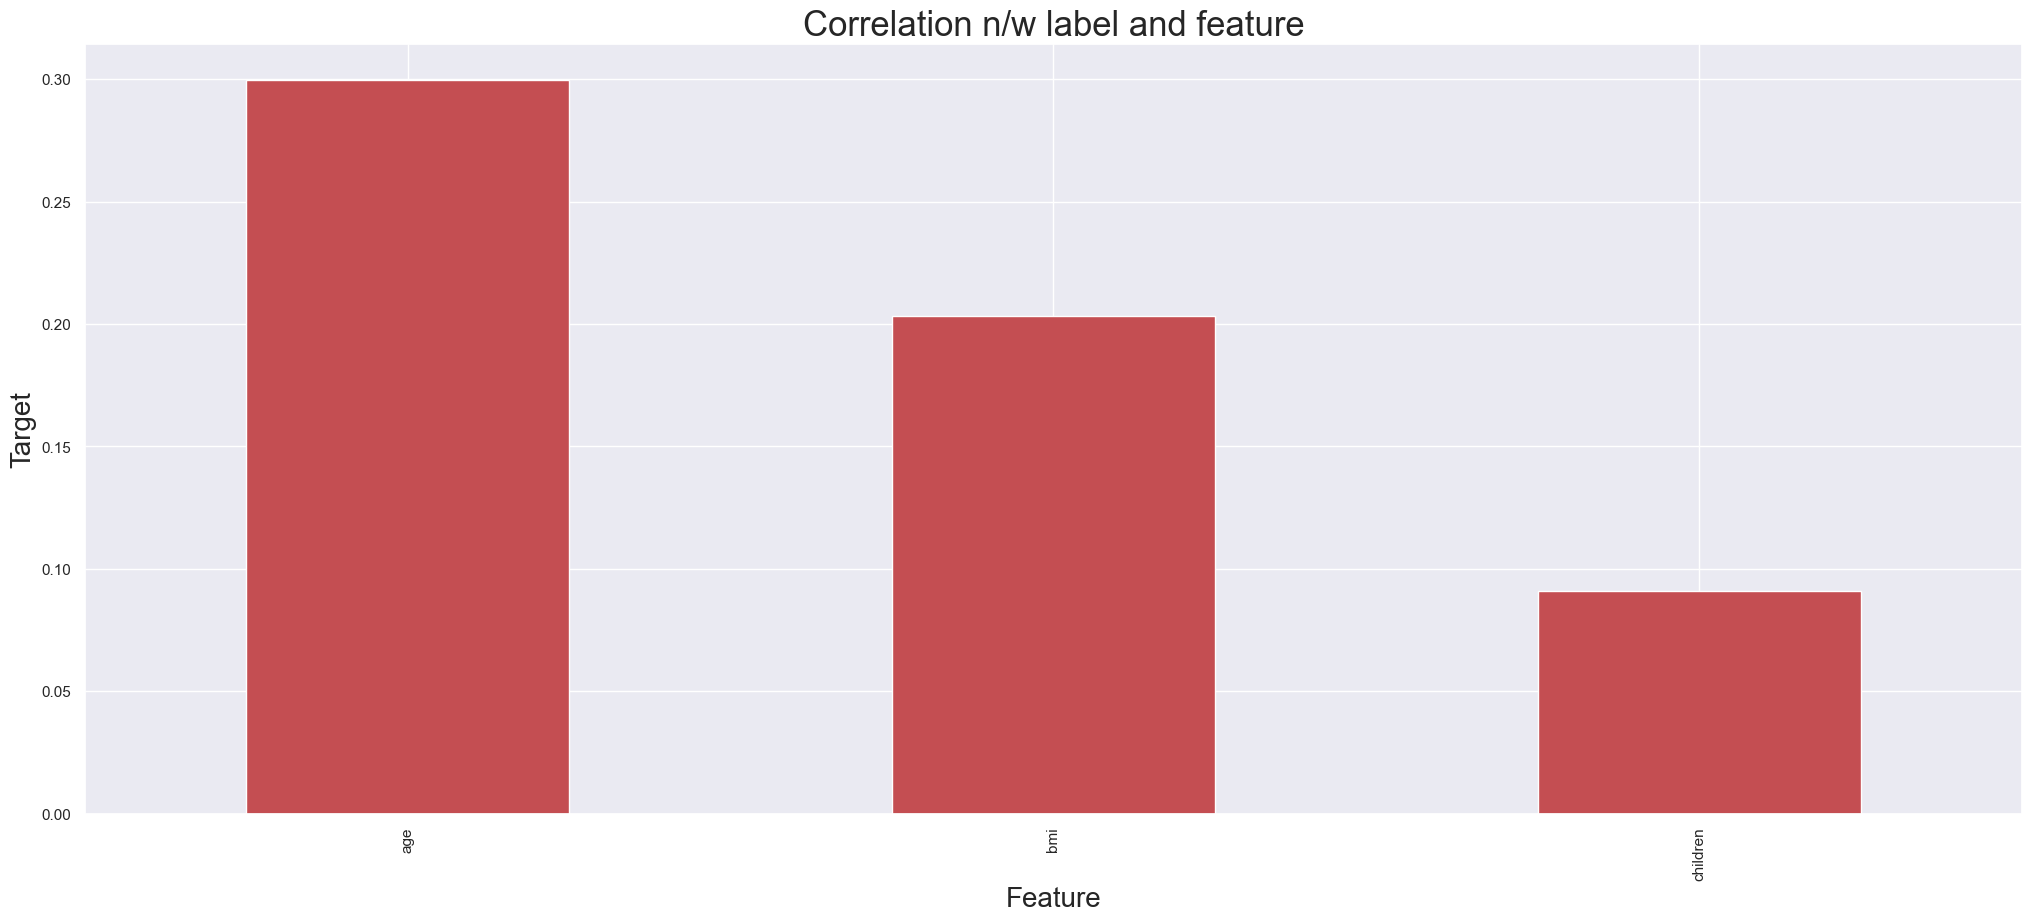

In [37]:
plt.figure(figsize = (25, 10))
medi_ds.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind='bar',color='r')
plt.xlabel('Feature', fontsize = 20)
plt.ylabel('Target', fontsize = 20)
plt.title('Correlation n/w label and feature', fontsize = 25)

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

medi_ds['sex'] = label_encoder.fit_transform(medi_ds['sex'])
medi_ds['smoker'] = label_encoder.fit_transform(medi_ds['smoker'])

medi_ds = pd.get_dummies(medi_ds, columns=['region'], drop_first=True)

medi_ds.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


Text(0.5, 1.0, 'Correlation b/2 label and features')

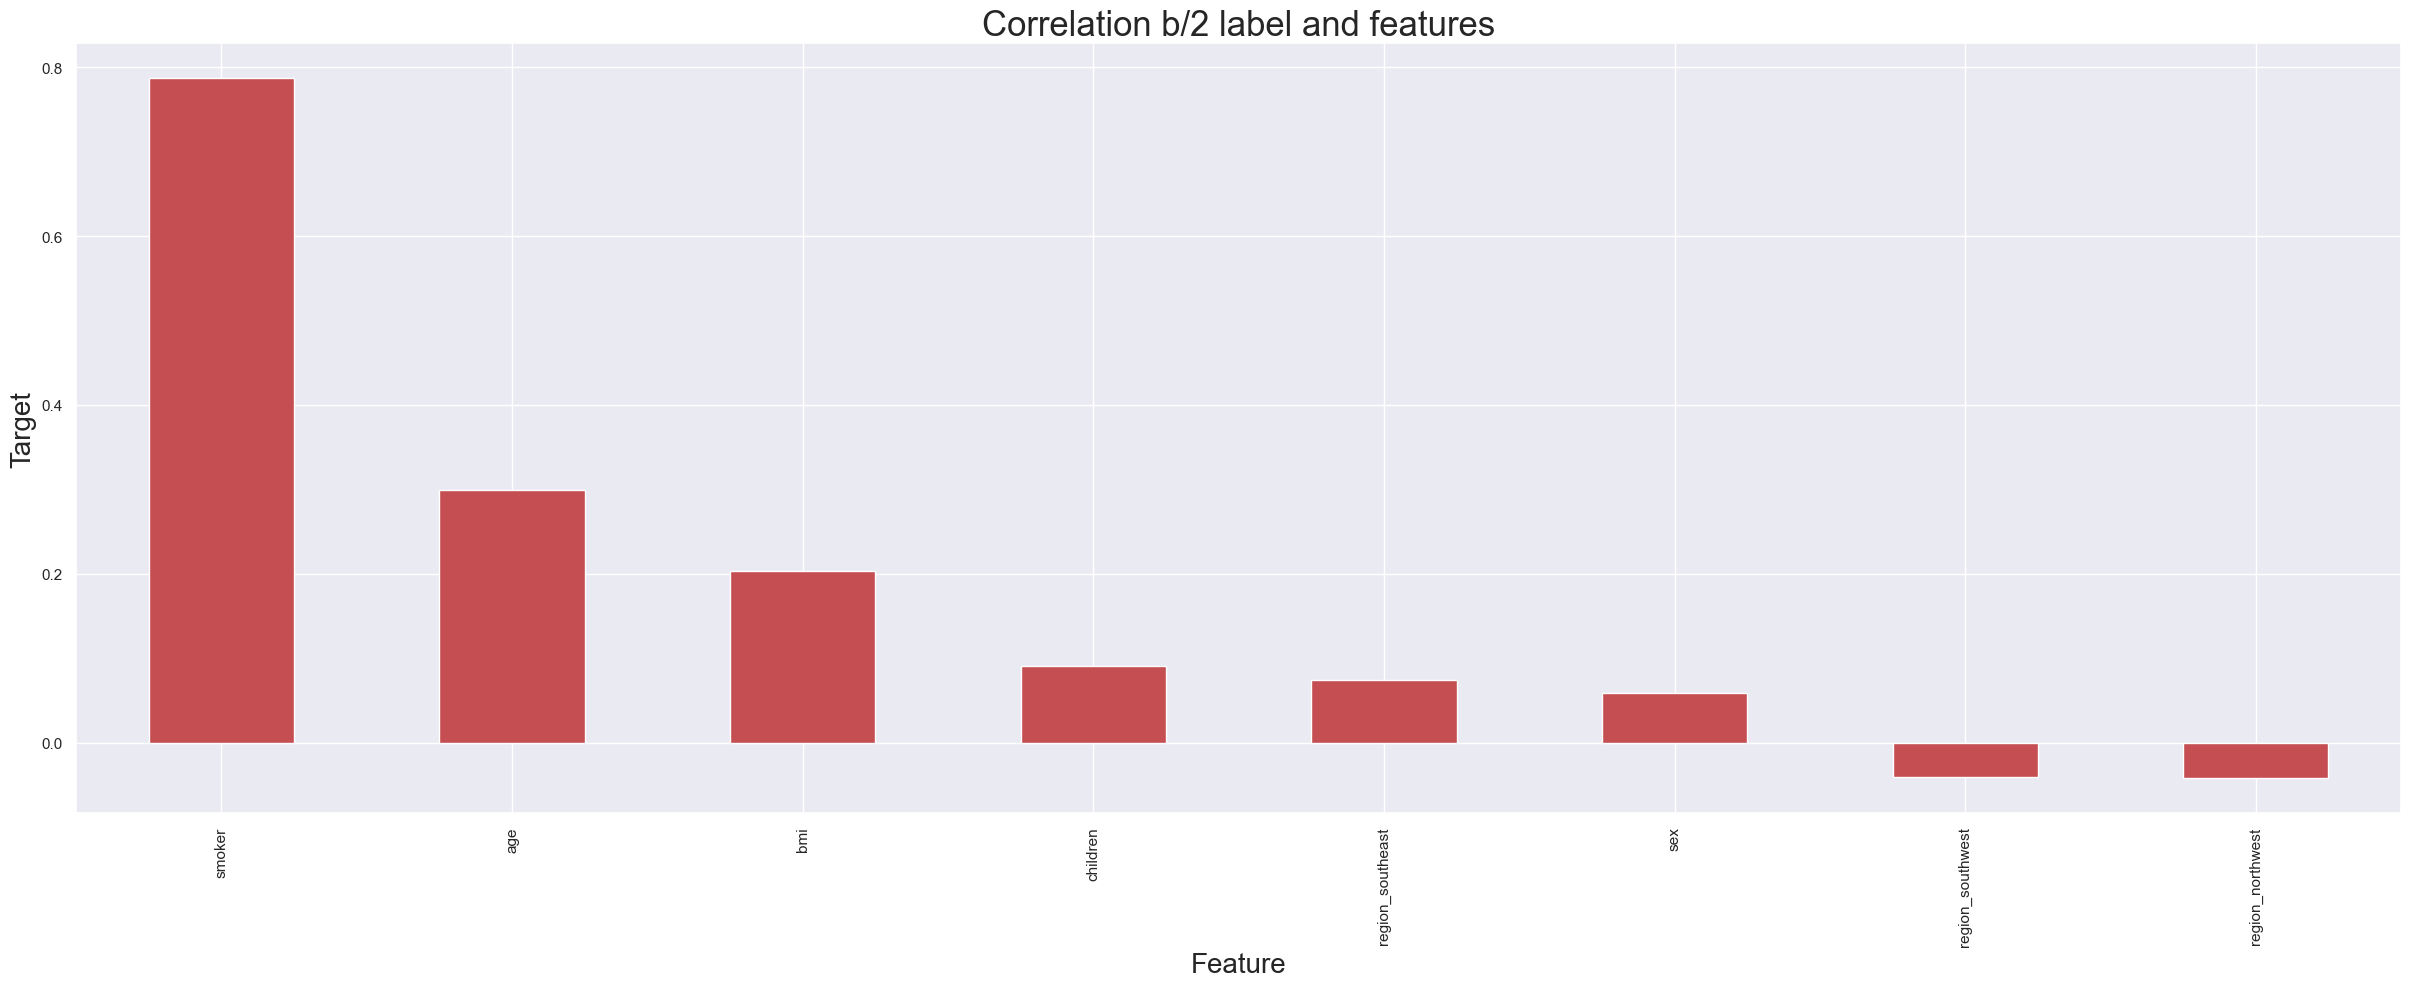

In [40]:
plt.figure(figsize = (30, 10))
medi_ds.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind='bar',color='r')
plt.xlabel('Feature', fontsize = 20)
plt.ylabel('Target', fontsize = 20)
plt.title('Correlation b/2 label and features', fontsize = 25)

In [41]:
medi_ds.drop(['region_southwest', 'region_northwest'], axis=1, inplace=True)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = medi_ds.drop('charges', axis=1)
y = medi_ds['charges']

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((1052, 6), (264, 6)), ((1052,), (264,)))

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

pred_train = lr_model.predict(X_train)
print('R2 score: ', r2_score(y_test,lr_pred))
print('R2 score - training Data: ', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, lr_pred))
print('Mean squared Error: ', mean_squared_error(y_test, lr_pred))
print('Root Mean squared Error: ', np.sqrt(mean_squared_error(y_test, lr_pred)))

R2 score:  0.7789846025388277
R2 score - training Data:  74.24694382517949
Mean Absolute Error:  4135.780853690256
Mean squared Error:  34598262.30812253
Root Mean squared Error:  5882.02875784559


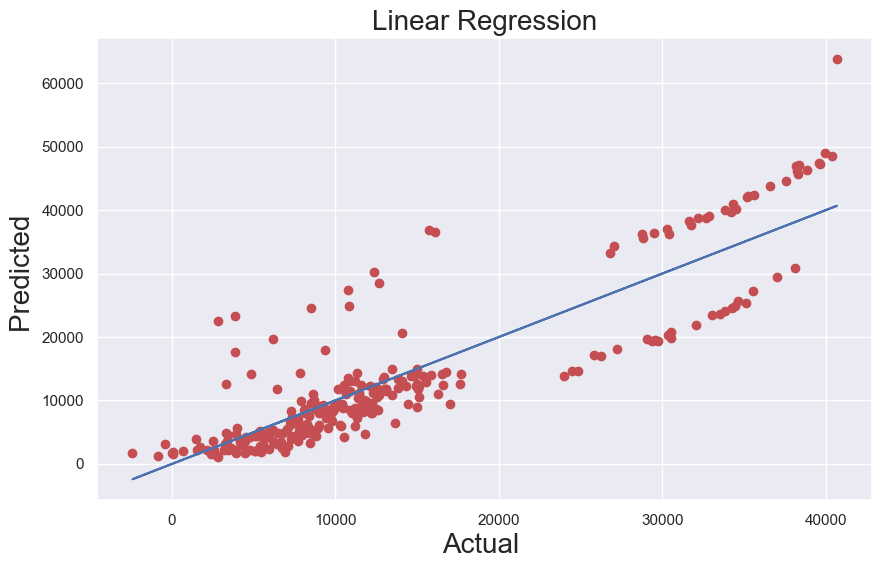

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(x=lr_pred,y=y_test,color='r')
plt.plot(lr_pred, lr_pred, color='b')
plt.xlabel('Actual ',fontsize = 20)
plt.ylabel('Predicted ', fontsize = 20)
plt.title('Linear Regression', fontsize = 20)

plt.show()

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


pred_train = rf_model.predict(X_train)
print('R2 score: ', r2_score(y_test,rf_pred))
print('R2 score - training Data: ', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, rf_pred))
print('Mean squared Error: ', mean_squared_error(y_test, rf_pred))
print('Root Mean squared Error: ', np.sqrt(mean_squared_error(y_test, rf_pred)))

R2 score:  0.8490373070739311
R2 score - training Data:  97.39170082236217
Mean Absolute Error:  2718.1048937030937
Mean squared Error:  23632049.660767484
Root Mean squared Error:  4861.280660563375


In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)

gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)


pred_train = gb_model.predict(X_train)
print('R2 score: ', r2_score(y_test,gb_pred))
print('R2 score - training Data: ', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, gb_pred))
print('Mean squared Error: ', mean_squared_error(y_test, gb_pred))
print('Root Mean squared Error: ', np.sqrt(mean_squared_error(y_test, gb_pred)))

R2 score:  0.8801872696051716
R2 score - training Data:  89.97864174391839
Mean Absolute Error:  2370.7806620366678
Mean squared Error:  18755762.36619842
Root Mean squared Error:  4330.79234854298


In [63]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

pred_train = gb_model.predict(X_train)
print('R2 score: ', r2_score(y_test,gb_pred))
print('R2 score - training Data: ', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, dt_pred))
print('Mean squared Error: ', mean_squared_error(y_test, dt_pred))
print('Root Mean squared Error: ', np.sqrt(mean_squared_error(y_test, dt_pred)))

R2 score:  0.8801872696051716
R2 score - training Data:  89.97864174391839
Mean Absolute Error:  3206.4180952651514
Mean squared Error:  44929734.86315413
Root Mean squared Error:  6702.964632396185


In [58]:
from sklearn.linear_model import Lasso,Ridge

lasso = Lasso()
lasso.fit(X_train, y_train)
pred_Lasso = lasso.predict(X_test)
pred_train = lasso.predict(X_train)
print('R2_score: ', r2_score(y_test,pred_Lasso))
print('R2_score on training Data: ', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred_Lasso))
print('Mean squared Error: ', mean_squared_error(y_test, pred_Lasso))
print('Root Mean squared Error: ', np.sqrt(mean_squared_error(y_test, pred_Lasso)))

R2_score:  0.7789927520875242
R2_score on training Data:  74.24693925556663
Mean Absolute Error:  4135.6688666860555
Mean squared Error:  34596986.558890894
Root Mean squared Error:  5881.920312184695


In [64]:
models = [
    ('LinearRegression', LinearRegression()),
    ('Lasso', Lasso()),
    ('RandomForestRegressor', RandomForestRegressor(random_state=42)),
    ('GradientBoostingRegressor', GradientBoostingRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),  
]

results = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((model_name, mse, r2))

result_df = pd.DataFrame(results, columns=['Model', 'Mean Squared Error', 'R2 Score']) 

result_df 

,Model,Mean Squared Error,R2 Score
0,LinearRegression,3.459826e+07,0.778985
1,Lasso,3.459699e+07,0.778993
2,RandomForestRegressor,2.363205e+07,0.849037
3,GradientBoostingRegressor,1.873567e+07,0.880316
4,DecisionTreeRegressor,4.215766e+07,0.730695
